In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import sklearn as sk
import numpy as np
import os
import random

# SEED all random generators
seed = 4
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

# ==============================================================================
# Chart variables
# ==============================================================================
titlesize = 14
subtitlesize = 14
labelsize = 14
axessize = 12
legendsize = 11
markersize = 5

# http://scipy-cookbook.readthedocs.io/items/Matplotlib_LaTeX_Examples.html
plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('grayscale')
# plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
font = font_manager.FontProperties(family='serif', size=legendsize)

# Markers - https://matplotlib.org/api/markers_api.html
markers = ["v", "^", "<", ">", "8", "s", "p", "P", "*", "+", "X", "D", "o", "s"]
linestyle_tuple = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple2 = [
#      ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),

#      ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

#      ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
#      ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
greyscale = ['silver', 'grey', 'lightgrey', 'black']
# Lines - https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

In [ ]:
df = pd.read_csv('data_predict.csv')
df

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True) #
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
from datetime import datetime
df = pd.read_csv('data_predict.csv')
# df["week_in_year"] = df["week_in_year"].apply(lambda x: x.split("-")[0] + "-" + str(datetime.strptime(x, "%Y-%m-%d").isocalendar()[1]))
df["week"] = df["week_in_year"].apply(lambda x: x.split("-")[0] + "-" + str(datetime.strptime(x, "%Y-%m-%d").isocalendar()[1]))
df["week_in_year"] = pd.to_datetime(df["week_in_year"], format="%Y-%m-%d") # .apply(lambda x: pd.to_datetime(x, format="%Y-%m-%d"))

df[df["model"] == "train"].plot(ax=ax[0], x="week_in_year", y="total_adults!BO", legend=False, color="blue")
df[df["model"] == "test"].plot(ax=ax[0], x="week_in_year", y="total_adults!BO", legend=False, color="blue", ls="--")
df[df["model"] == "test-sarimax"].plot(ax=ax[0], x="week_in_year", y="total_adults!BO", legend=False, color="orange", ls="--")
# plt.xticks([])  # Rotate x-axis ticks by 45 degrees

df[(df["model"] == "train")|(df["model"] == "test")].plot(ax=ax[1], x="week_in_year", y="total_adults!BO", legend=False, color="blue")
df[(df["model"] == "prediction-sarimax")].plot(ax=ax[1], x="week_in_year", y="total_adults!BO", legend=False, color="blue", marker="o", markerfacecolor="orange")
ax[0].grid()
ax[1].grid()
ax[0].set_title("BO ($R^2=0.98$)")
ax[1].set_title("BO")
ax[1].set_xlabel("$\sf{week}$")
ax[0].set_ylabel("$\sf{adults}$")
ax[1].set_ylabel("$\sf{adults}$")
ax[1].set_xticklabels(["", "2022-26", "2022-39", "2023-01", "2023-13", "2023-26", "2023-39", "2024-01", "2024-13", "2024-26", "2024-39", ]) # datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").strftime("%Y-%W"))))

plt.xticks(rotation=90)  # Rotate x-axis ticks by 45 degrees
plt.tight_layout()  # Adjust layout to prevent clipping

Characters

- cross corr: 640
- multi reg: 676
- polyfit: 97+331+136+171+579+211 = 1525
- tot: 2841


In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True) #
df = pd.read_csv('data_predict.csv')
df["week"] = df["week_in_year"].apply(lambda x: x.split("-")[0] + "-" + str(datetime.strptime(x, "%Y-%m-%d").isocalendar()[1]))
df["week_in_year"] = pd.to_datetime(df["week_in_year"], format="%Y-%m-%d") # .apply(lambda x: pd.to_datetime(x, format="%Y-%m-%d"))
df[df["model"] == "train"].plot(ax=ax[0], x="week_in_year", y="adults!BO", legend=False, color="blue")
df[df["model"] == "test"].plot(ax=ax[0], x="week_in_year", y="adults!BO", legend=False, color="blue", ls="--")
df[df["model"] == "test-tree"].plot(ax=ax[0], x="week_in_year", y="adults!BO", legend=False, color="orange", ls="--")
df[(df["model"] == "train")|(df["model"] == "test")].plot(ax=ax[1], x="week_in_year", y="adults!BO", legend=False, color="blue")
df[(df["model"] == "prediction-tree")].plot(ax=ax[1], x="week_in_year", y="adults!BO", legend=False, color="blue", marker="o", markerfacecolor="orange")
ax[0].grid()
ax[1].grid()
ax[0].set_title("BO ($R^2=0.67$)")
ax[1].set_title("BO")
ax[1].set_xlabel("$\sf{week}$")
ax[0].set_ylabel("$\sf{adults}$")
ax[1].set_ylabel("$\sf{adults}$")
ax[1].set_xticklabels(["", "2022-26", "2022-39", "2023-01", "2023-13", "2023-26", "2023-39", "2024-01", "2024-13", "2024-26", "2024-39", ]) # datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").strftime("%Y-%W"))))

plt.xticks(rotation=90)  # Rotate x-axis ticks by 45 degrees
plt.tight_layout()  # Adjust layout to prevent clipping

# df


/tmp/ipykernel_1913501/4067164300.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "2023-26", "2023-39", "2024-01", "2024-13", "2024-26", "2024-39", ]) # datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").strftime("%Y-%W"))))
/tmp/ipykernel_1913501/4067164300.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "2023-26", "2023-39", "2024-01", "2024-13", "2024-26", "2024-39", ]) # datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").strftime("%Y-%W"))))


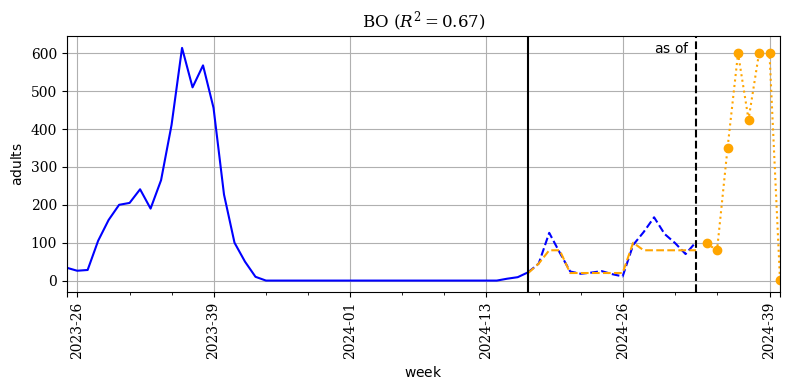

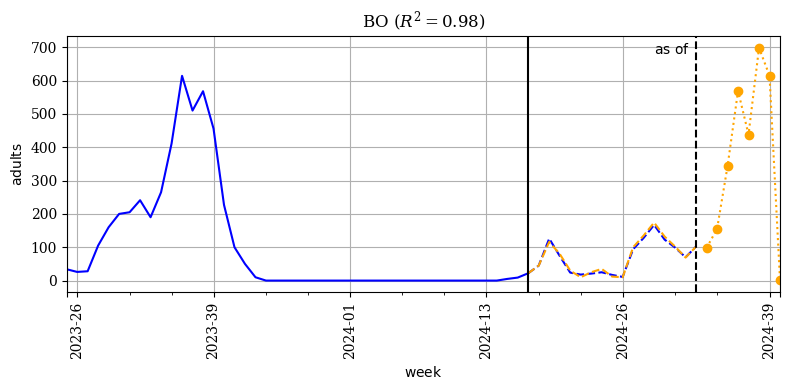

In [112]:
for x in ["tree", "sarimax"]:
     fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 4)) #
     df = pd.read_csv('data_predict.csv')
     df = df.tail(n=120)
     df["week"] = df["week_in_year"].apply(lambda x: x.split("-")[0] + "-" + str(datetime.strptime(x, "%Y-%m-%d").isocalendar()[1]))
     df["week_in_year"] = pd.to_datetime(df["week_in_year"], format="%Y-%m-%d") # .apply(lambda x: pd.to_datetime(x, format="%Y-%m-%d"))
     df[df["model"] == "train"].plot(ax=ax, x="week_in_year", y="adults!BO", legend=False, color="blue")
     df[df["model"] == "test"].plot(ax=ax, x="week_in_year", y="adults!BO", legend=False, color="blue", ls="--")
     df[df["model"] == f"test-{x}"].plot(ax=ax, x="week_in_year", y="adults!BO", legend=False, color="orange", ls="--")
     df[(df["model"] == f"prediction-{x}")].plot(ax=ax, x="week_in_year", y="adults!BO", legend=False, color="orange", ls=":", marker="o", markerfacecolor="orange")
     ax.grid()
     ax.axvline(df["week_in_year"].loc[105], c="black")
     ax.axvline(df["week_in_year"].loc[122], c="black", ls="--")
     plt.text(df["week_in_year"].loc[118], 600 if x == "tree" else 680, '$\sf{as}$ $\sf{of}$', rotation=0)
     ax.set_title("BO ($R^2=0.67$)" if x == "tree" else "BO ($R^2=0.98$)")
     ax.set_xlabel("$\sf{week}$")
     ax.set_ylabel("$\sf{adults}$")
     ax.set_xticklabels(["", "2023-26", "2023-39", "2024-01", "2024-13", "2024-26", "2024-39", ]) # datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").strftime("%Y-%W"))))
     # , "2022-26", "2022-39", "2023-01", "2023-13",
     plt.xticks(rotation=90)  # Rotate x-axis ticks by 45 degrees
     plt.tight_layout()  # Adjust layout to prevent clipping
     fig.savefig(f"data-cimice-{x}.svg")
     fig.savefig(f"data-cimice-{x}.pdf")
# df
plt.show()
